Analysis of US election 2012


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from collections import defaultdict
import json
import numpy as np

## Question - 1

In [2]:
electoral_votes = pd.read_csv("data/electoral_votes.csv").set_index('State')
electoral_votes.head()

,Votes
State,
California,55
Texas,38
New York,29
Florida,29
Illinois,20


In [3]:
!type data\predictwise.csv
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
predictwise.head()

Obama,Romney,States,Votes
0.0,1.0,Alabama,9
0.0,1.0,Alaska,3
0.062,0.938,Arizona,11
0.0,1.0,Arkansas,6
1.0,0.0,California,55
0.807,0.193,Colorado,9
1.0,0.0,Connecticut,7
1.0,0.0,Delaware,3
1.0,0.0,District of Columbia,3
0.72,0.28,Florida,29
0.004,0.996,Georgia,16
1.0,0.0,Hawaii,4
0.0,1.0,Idaho,4
1.0,0.0,Illinois,20
0.036000000000000004,0.9640000000000001,Indiana,11
0.8370000000000001,0.163,Iowa,6
0.0,1.0,Kansas,6
0.0,1.0,Kentucky,8
0.0,1.0,Louisiana,8
1.0,0.0,Maine,4
1.0,0.0,Maryland,10
1.0,0.0,Massachusetts,11
0.987,0.013000000000000001,Michigan,16
0.982,0.018000000000000002,Minnesota,10
0.0,1.0,Mississippi,6
0.07400000000000001,0.9259999999999999,Missouri,10
0.046,0.9540000000000001,Montana,3
0.0,1.0,Nebraska,5
0.851,0.149,Nevada,6
0.857,0.14300000000000002,New Hampshire,4
0.998,0.002,New Jersey,14
0.985,0.015,New Mexico,5
1.0,0.0,New York,29
0.349,0.6509999999999999,North Carolina,15
0.025,0.975,North Dakota,3
0.89,0.11,Ohio,18
0.0,1.0,Oklahoma,7
0.976,0.024,Oregon,7
0.978,0.0220000

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


### 1.1
Each row is the probability predicted by Predictwise that Romney or Obama would win a state.The votes column lists the
number of electoral college votes in that state. Use make_map to plot a map of the probability that Obama wins each state, 
according to this prediction.

In [4]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [5]:
state2poly = defaultdict(list)

data = json.load(open("data/us-states.json"))
for f in data['features']:
    state = states_abbrev[f['id']]
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)


In [6]:
def draw_state(plot, stateid, **kwargs):
     for polygon in state2poly[stateid]:
        xs, ys = zip(*polygon)
        plot.fill(xs, ys, **kwargs)

In [7]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [8]:
def make_map(states, label):
    fig = plt.figure(figsize=(12, 9))
    ax = plt.gca()

    if states.max() < 2: # colormap for election probabilities 
        cmap = cm.RdBu
        vmin, vmax = 0, 1
    else:  # colormap for electoral votes
        cmap = cm.binary
        vmin, vmax = 0, states.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
    for state in states_abbrev.values():
        if state in skip:
            continue
        color = cmap(norm(states[state]))
        draw_state(ax, state, color = color, ec='k')

    #add an inset colorbar
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])    
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    ax1.set_title(label)
    remove_border(ax, left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    return ax

Using make_map to plot a map of the probability that Obama wins each state, according to this prediction.

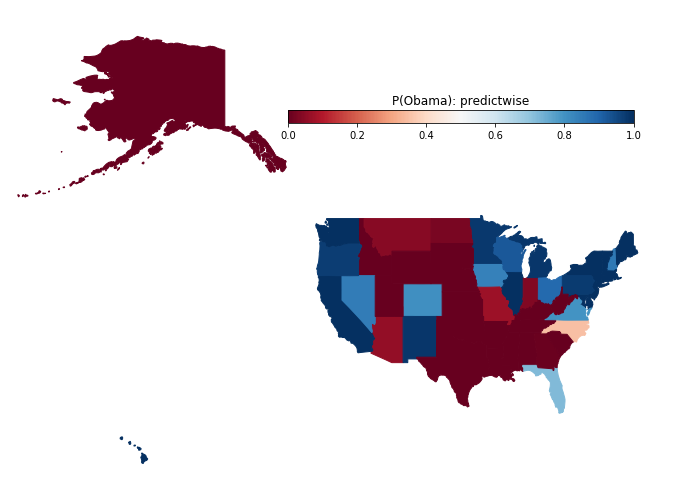

In [9]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
predictwise.head()
make_map(predictwise.Obama, "P(Obama): predictwise");

### 1.2
We will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama 
is given by a Dataframe of state-wise win probabilities. *Write a function that uses this **predictive model** to simulate the 
outcome of the election given a Dataframe of probabilities*.

In [10]:
def simulate_election(model, n_sim):
    #each column simulates a single outcome from the 50 states + DC
    #Obama wins the simulation if the random number is < the win probability
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

In [11]:
result = simulate_election(predictwise, 10000)
np.mean(result>=269)

0.9947

### 1.3 
Now, write a function called plot_simulation to visualize the simulation. This function should:

Build a histogram from the result of simulate_election
Overplot the "victory threshold" of 269 votes as a vertical black line (hint: use axvline)
Overplot the result (Obama winning 332 votes) as a vertical red line
Compute the number of votes at the 5th and 95th quantiles, and display the difference (this is an estimate of the outcome's uncertainty)
Display the probability of an Obama victory

In [12]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    remove_border()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


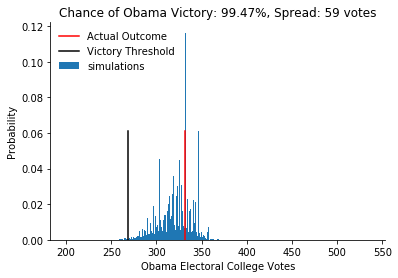

In [13]:
plot_simulation(result)

### 1.4
Suppose that we believe the model is correct. Under this assumption, we can **evaluate** our prediction by characterizing its 
**accuracy** and **precision** (see [here](http://celebrating200years.noaa.gov/magazine/tct/accuracy_vs_precision_556.jpg)
for an illustration of these ideas).
*What does the above plot reveal about the **accuracy** and **precision** of the PredictWise model?*


The accuracy of any model can be determined by evaluating the predictive distribution with the true outcome. In our analysis, the model seems to look accurate based on the outcome we observed with the predictive distribution's mass that lies around the real outcome. Looking at the spread of the histogram, we can evaluate the precision of our prediction. The spread of the histogram can be interpreted as a measure of the variability among the election outcomes that are consistent.


###  1.5
Unfortunately, we can never be *absolutely sure* that a model is correct, just as we can never be absolutely sure that 
the sun will rise tomorrow. But we can test a model by making predictions assuming that it is true and comparing it to real 
events -- this constitutes a hypothesis test. After testing a large number of predictions, if we find no evidence that says the
model is wrong, we can have some degree of confidence that the model is right (the same reason we're still quite confident about
the sun being here tomorrow). We call this process **model checking**, and use it to **validate** our model.

Describe how the graph provides one way of checking whether the prediction model is correct. How many predictions have we 
checked in this case? How could we increase our confidence in the model's correctness?


Hypothesis test is shown by the graph, predictive distribution of election outcome is roughty predicted as true by the histogram if the model is assumed as true. If outcome is true, the outcome appears roughly similar. Hence, we do not reject the model instead we check outcome, there will be only one outcome since we will have only one outcome as true that we have compared with predictive distribution. The testing of more outcomes increases our confidence.

### **1.6** 
This survey can be used to predict the outcome of each State's election. The simplest forecast model assigns 100% 
probability that the state will vote for the majority party. *Implement this simple forecast*

In [14]:
gallup_2012=pd.read_csv("data/g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


In [15]:
def simple_gallup_model(gallup_dataframe):
    #gallup_2012 = pd.read_csv('data/g12.csv').set_index('State')
    #gallup_2012["Obama"] = gallup_2012.Democrat-gallup_2012.Republican
    gallup1=gallup_dataframe.copy()
    gallup1['Obama']=gallup1.Dem_Adv>0
    model=gallup1[['Obama']].astype(float)
    return model

In [16]:
simple_gallup_model(gallup_2012)

,Obama
State,
Alabama,0.0
Alaska,0.0
Arizona,0.0
Arkansas,1.0
California,1.0
Colorado,0.0
Connecticut,1.0
Delaware,1.0
District of Columbia,1.0


In [17]:
simple_gallup_model(gallup_2012).loc['Florida']

Obama    1.0
Name: Florida, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


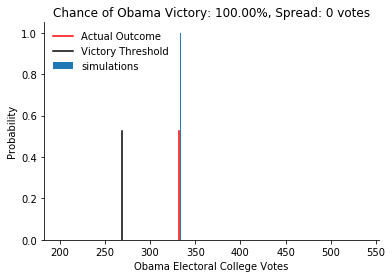

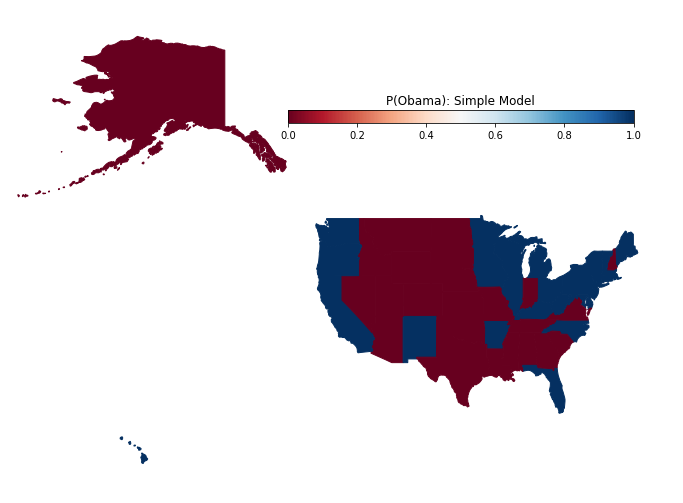

In [18]:
model=simple_gallup_model(gallup_2012)
model = model.join(electoral_votes)
prediction = simulate_election(model, 10000)

plot_simulation(prediction)
plt.show()
make_map(model.Obama, "P(Obama): Simple Model")

### **1.7** 
Attempt to **validate** the predictive model using the above simulation histogram. *Does the evidence contradict the predictive model?*

The color red in the graph shows that the true outcome of the probability is zero according to the predictive model, therefore the evicence contradict the predictive model.

### **1.8**
Use Gallup's estimate of 3% to build a Gallup model with some uncertainty. Assume that the `Dem_Adv` column represents the mean of a Gaussian, whose standard deviation is 3%. Build the model in the function `uncertain_gallup_model`. *Return a forecast where the probability of an Obama victory is given by the probability that a sample from the `Dem_Adv` Gaussian is positive.*

Hint The probability that a sample from a Gaussian with mean  𝜇  and standard deviation  𝜎  exceeds a threhold  𝑧  can be found using the the Cumulative Distribution Function of a Gaussian:

𝐶𝐷𝐹(𝑧)= 0.5*(1+(erf((z-mu)/math.sqrt(2*sigma*sigma))))

In [19]:
from scipy.special import erf
import math
def uncertain_gallup_model(gallup_dataframe):
    gallup2=gallup_dataframe.copy()
    z=gallup2.Dem_Adv
    mu=0
    sigma=3
    cdf=0.5*(1+(erf((z-mu)/math.sqrt(2*sigma*sigma))))
    gallup2['Obama']=cdf
    model=gallup2[['Obama']]
    return model

In [20]:
uncertain_gallup_model(gallup_2012)

,Obama
State,
Alabama,2.903004e-06
Alaska,2.555130e-03
Arizona,6.209665e-03
Arkansas,5.922487e-01
California,9.999975e-01
Colorado,4.151822e-02
Connecticut,9.999999e-01
Delaware,1.000000e+00
District of Columbia,1.000000e+00


In [21]:
uncertain_gallup_model(gallup_2012).loc['Florida']

Obama    0.592249
Name: Florida, dtype: float64

In [22]:
model

,Obama,Votes
State,,
Alabama,0.0,9
Alaska,0.0,3
Arizona,0.0,11
Arkansas,1.0,6
California,1.0,55
Colorado,0.0,9
Connecticut,1.0,7
Delaware,1.0,3
District of Columbia,1.0,3


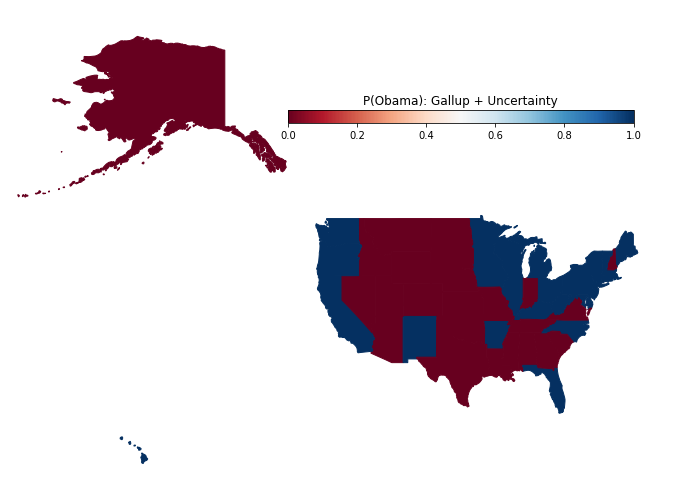

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


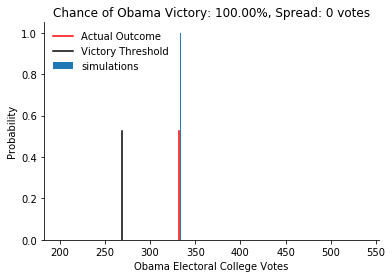

In [23]:
make_map(model.Obama, "P(Obama): Gallup + Uncertainty")
plt.show()
prediction = simulate_election(model, 10000)
plot_simulation(prediction)

### **1.9** 
*Attempt to **validate** the above model using the histogram. Does the predictive distribution appear to be consistent with the real data? Comment on the accuracy and precision of the prediction.*

The predictive distribution is consistet with the real data. Since the accuracy seems bad as the center of distribution falls dar from the observed outcome.The precison is marginally bad than in the predictwise case.

### **1.10** 
*Implement a `biased_gallup` forecast, which assumes the vote share for the Democrat on election day will be equal to `Dem_Adv` shifted by a fixed negative amount.* We will call this shift the "bias", so a bias of 1% means that the expected vote share on election day is `Dem_Adv`-1.

Hint You can do this by wrapping the uncertain_gallup_model in a function that modifies its inputs.

In [24]:
def biased_gallup(gallup_dataframe,bias):
    gallup3=gallup_dataframe.copy()
    gallup3.Dem_Adv=gallup3.Dem_Adv-bias
    return uncertain_gallup_model(gallup3)

### **1.11** 
*Simulate elections assuming a bias of 1% and 5%, and plot histograms for each one.*

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


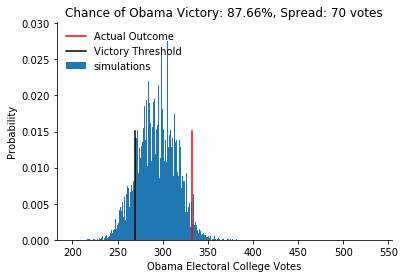

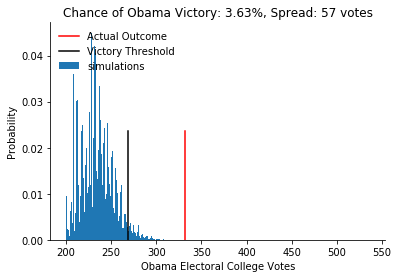

In [25]:
model = biased_gallup(gallup_2012, 1)
model = model.join(electoral_votes)
prediction = simulate_election(model, 10000)
plot_simulation(prediction)
plt.show()

model = biased_gallup(gallup_2012, 5)
model = model.join(electoral_votes)
prediction = simulate_election(model, 10000)
plot_simulation(prediction)
plt.show()

### 1.12 
Make a scatter plot using the prediction_08 dataframe of the democratic advantage in the 2008 Gallup poll (X axis) compared to the democratic win percentage -- the difference between Obama and McCain's vote percentage -- in the election (Y Axis). Overplot a linear fit to these data.

Hint The np.polyfit function can compute linear fits, as can sklearn.linear_model.LinearModel

In [26]:
gallup_08 = pd.read_csv("data/g08.csv").set_index('State')
results_08 = pd.read_csv('data/2008results.csv').set_index('State')

prediction_08 = gallup_08[['Dem_Adv']]
prediction_08['Dem_Win']=results_08["Obama Pct"] - results_08["McCain Pct"]
prediction_08.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Dem_Adv,Dem_Win
State,,
Alabama,-0.8,-21.58
Alaska,-10.6,-21.53
Arizona,-0.4,-8.52
Arkansas,12.5,-19.86
California,19.4,24.06


[  1.26390486 -11.32855786]


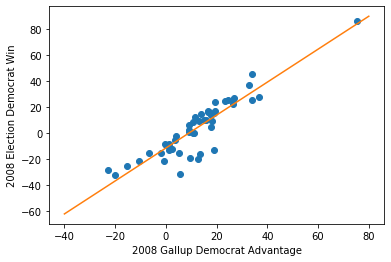

In [27]:
plt.plot(prediction_08.Dem_Adv, prediction_08.Dem_Win, 'o')
plt.xlabel("2008 Gallup Democrat Advantage")
plt.ylabel("2008 Election Democrat Win")
fit = np.polyfit(prediction_08.Dem_Adv, prediction_08.Dem_Win, 1)
x = np.linspace(-40, 80, 10)
y = np.polyval(fit, x)
plt.plot(x, y)
print(fit)

In [28]:
Dem_Lost=pd.DataFrame(prediction_08[(prediction_08.Dem_Win<0)&(prediction_08.Dem_Adv>0)])
Dem_Lost

,Dem_Adv,Dem_Win
State,,
Arkansas,12.5,-19.86
Georgia,3.6,-5.21
Kentucky,13.5,-16.23
Louisiana,9.4,-18.63
Mississippi,1.1,-13.18
Missouri,10.9,-0.14
Montana,3.9,-2.26
North Dakota,0.6,-8.63
Oklahoma,5.6,-31.30


In [29]:
print((prediction_08.Dem_Adv - prediction_08.Dem_Win).mean())

8.068039215686275


### **1.13** * 
**Calibrate** your forecast of the 2012 election using the estimated bias from 2008. Validate the resulting model against the real 2012 outcome. Did the calibration help or hurt your prediction?*

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


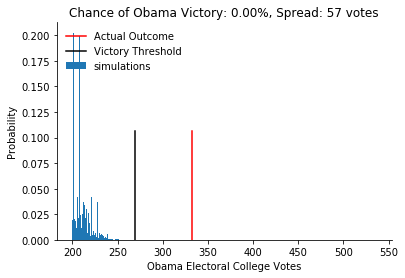

In [30]:
model=biased_gallup(gallup_2012, 8.06)
model=model.join(electoral_votes)
prediction=simulate_election(model,10000)
plot_simulation(prediction)